In [1]:
#data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#Model Evaluation
from sklearn.model_selection import cross_val_score

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#put a r in front of string to make it a raw string or change the \ slashes with /
ss =  pd.read_csv(r"C:\Users\Chen\Documents\Programming\Kaggle\titanic\gender_submission.csv")
train  = pd.read_csv(r"C:\Users\Chen\Documents\Programming\Kaggle\titanic\train.csv")
test = pd.read_csv(r"C:\Users\Chen\Documents\Programming\Kaggle\titanic\test.csv")

In [3]:
#Look at the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape", test.shape)

Training set shape:  (891, 12)
Test set shape (418, 11)


In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
#DATA TYPES, ms=issing data and summary statistics

train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
#Missing data in training set by columns
#by setting ascending to false, the missing data is sorted form highest to lowest

train.isnull().sum().sort_values(ascending = False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending=False)
#Missing dataset in the test column

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

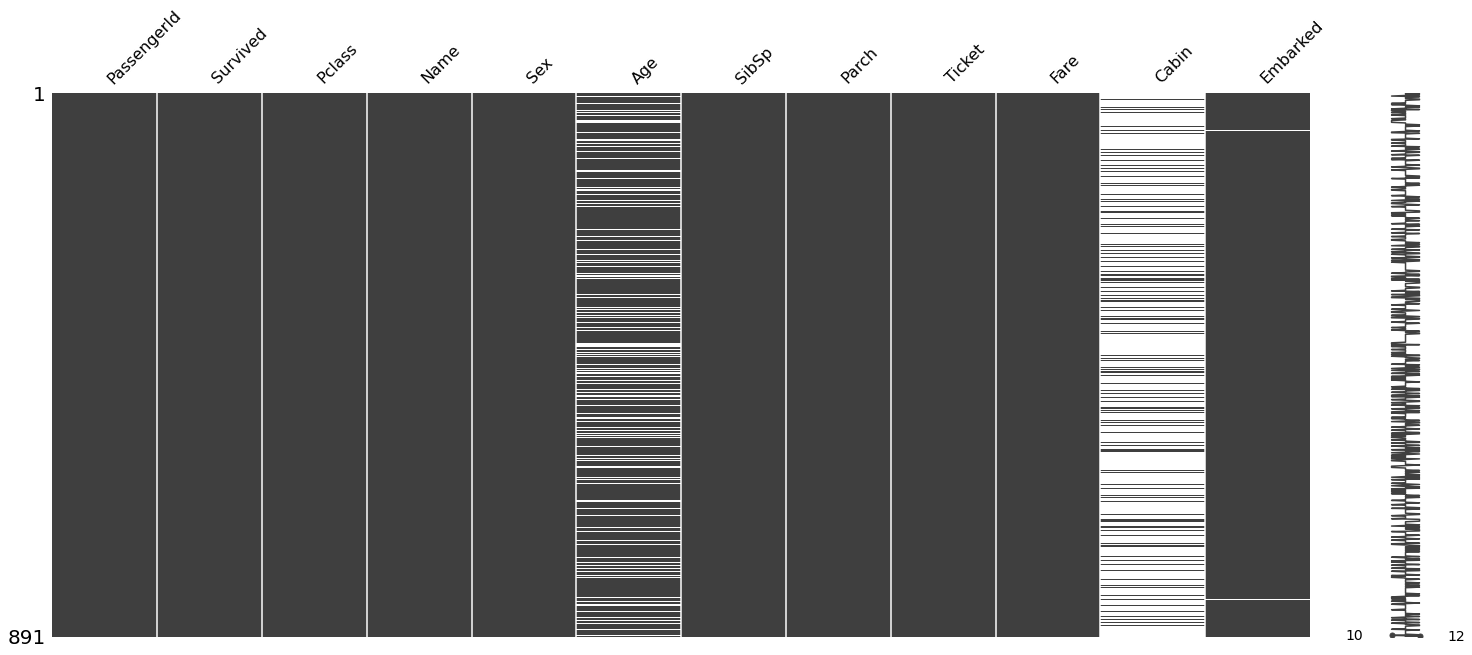

In [10]:
#plotting missing values
missingno.matrix(train)

<AxesSubplot:>

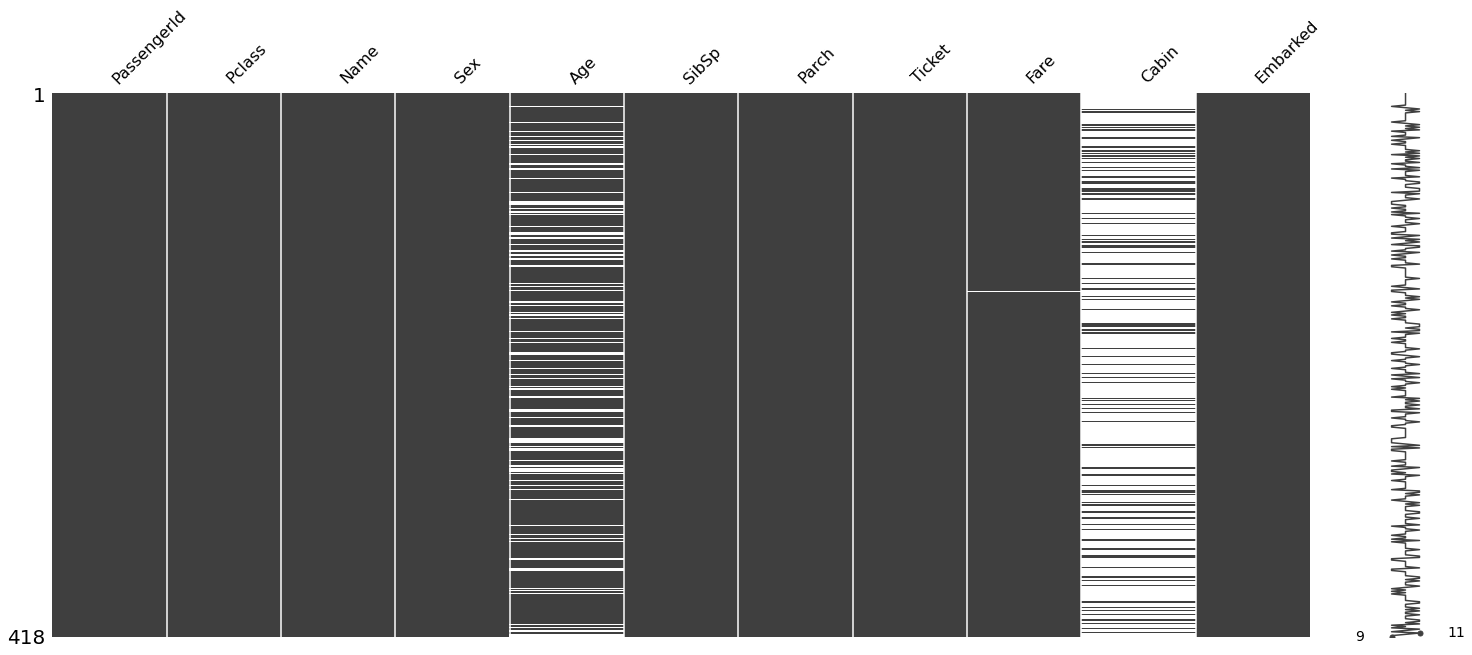

In [11]:
missingno.matrix(test)

In [12]:
#Summary statistics for training set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Feature Analysis
#Difference between categorical and numerical variable
#Categorical var have more than two categories of value
#and usually have no intrisic ordering, like Male or Female

#Numerical Values have a continuous distribution like age and fare

#It doesn't make sense to calcuolate the average of a categorical value since
#it's a binary classification therefore no intrinsic ordring to its values

Categorical Values such as SEX, Pclass, and embarked


In [14]:
#sex, drop na = false = show missing values in column if any
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending= False)
#from train datset grab sex and survivied, if as_index = true, returns group label as index, so false
#Then get the mean value of survived in a decensing order

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
#Pclass
train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survivial Probability by Passenger Class')

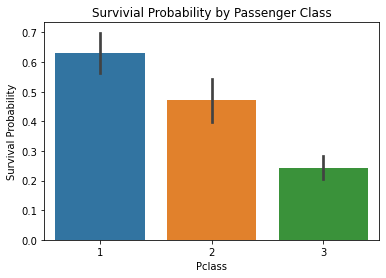

In [18]:
sns.barplot(x='Pclass', y='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survivial Probability by Passenger Class')

Text(0.5, 1.0, 'Survivial Probability by Sex and Passenger Class')

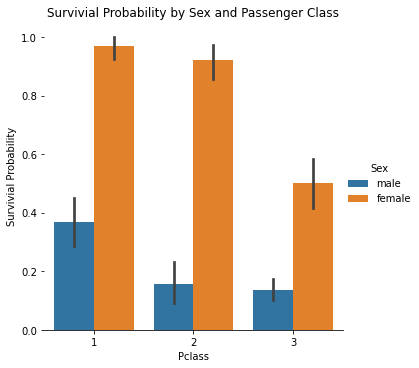

In [19]:
#survival by gender and passenger

g = sns.factorplot(x='Pclass', y='Survived', hue = 'Sex', data = train, kind='bar')
g.despine(left=True)
plt.ylabel('Survivial Probability')
plt.title('Survivial Probability by Sex and Passenger Class')

In [20]:
#embark
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [21]:
train[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survivial probability byb point of Embarkation')

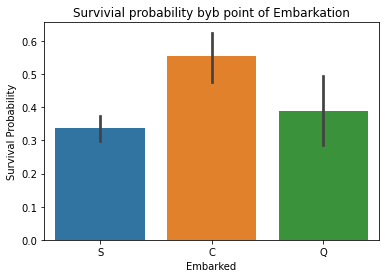

In [22]:
sns.barplot(x='Embarked', y='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survivial probability byb point of Embarkation')

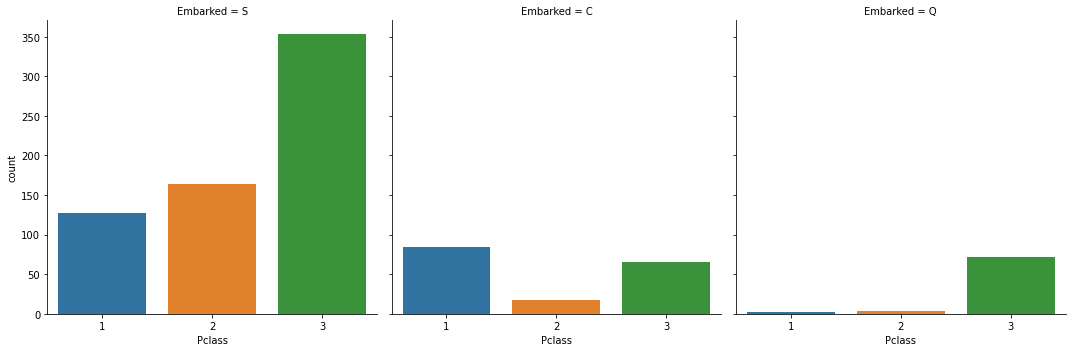

In [23]:
sns.factorplot('Pclass', col = 'Embarked', data  =train, kind = 'count')
#You can see here the relationship between the class and where they embarked

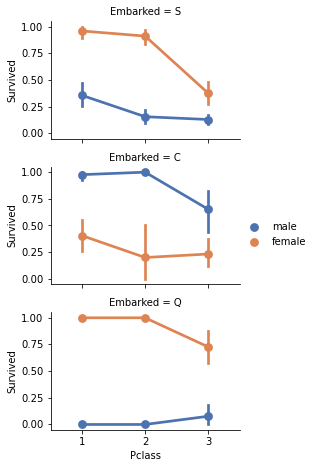

In [24]:
grid=sns.FacetGrid(train, row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

Numerical Variables in our dataset are SibSP, Parch, Age, and Fare

In [25]:
#detect and remove outliers in numerical variables
#important to remove extreme cases 
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[col]<Q1-outlier_step) | (df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value>n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)),outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [26]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [27]:
#Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop,axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

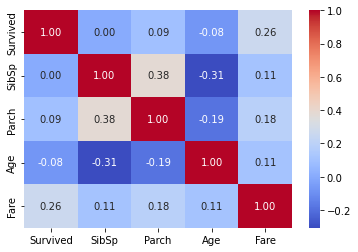

In [28]:
#Numerical Values correlation with survival rate

sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt = '.2f', cmap = 'coolwarm')

#fare seems to be only feture with substantial correlation with survival

In [29]:
train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [30]:
train[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

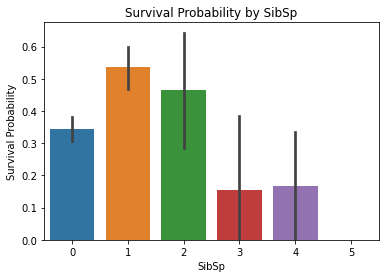

In [31]:
sns.barplot(x='SibSp', y = 'Survived', data= train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [32]:
#Value counts of the Parch column

train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
train[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

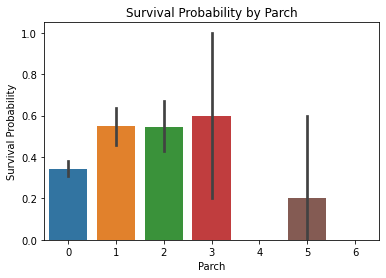

In [34]:
sns.barplot(x='Parch', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [35]:
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

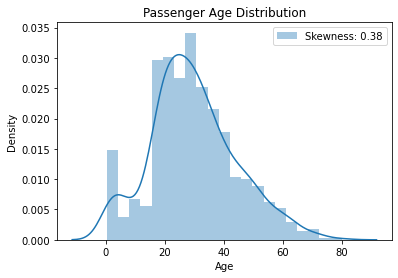

In [36]:
sns.distplot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

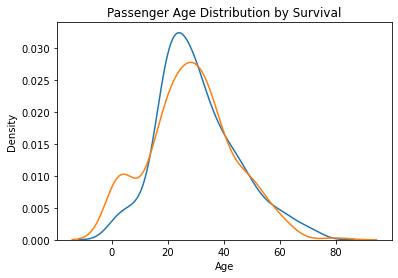

In [37]:
sns.kdeplot(train['Age'][train['Survived']==0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived']==1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

Data preprocessing

In [38]:
#drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1);
test = test.drop(['Ticket','Cabin'], axis = 1);


In [39]:
#Missing Value in training set
print(train.isnull().sum().sort_values(ascending=False));

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64


In [40]:
#Compute the mot frequent value of embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [41]:
train['Embarked'].fillna(mode, inplace=True)

In [42]:
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [43]:
#mode = number thar occurs the most often, median = average
median = test['Fare'].dropna().median()
median

14.4542

In [44]:
test['Fare'].fillna(median, inplace=True)

In [45]:
#combining trainng and testing dataset together

combine = pd.concat([train, test], axis =0).reset_index(drop = True);
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [46]:
combine.isnull().sum().sort_values(ascending = False)


Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [47]:
combine['Sex'] = combine['Sex'].map({'male':0, 'female' : 1})
#Also encoding Sex into numerical values of 0 and 1


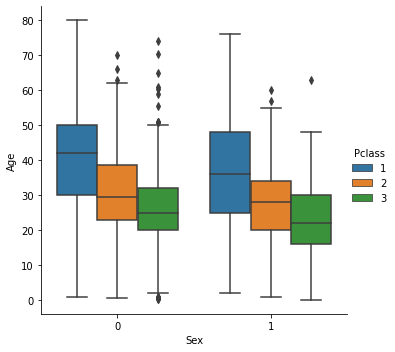

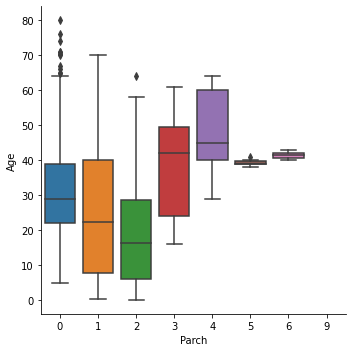

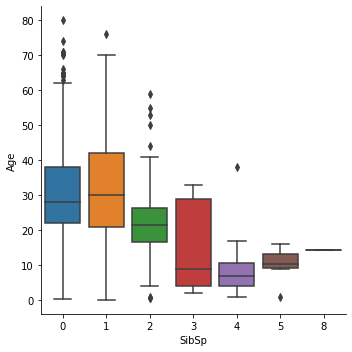

In [48]:
#Since age is missing a lot, we need to use features most correlated with Age to predict values for age

sns.factorplot(y='Age', x='Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y='Age', x='Parch', kind='box', data = combine)
sns.factorplot(y='Age', x='SibSp', kind = 'box', data = combine)

<AxesSubplot:>

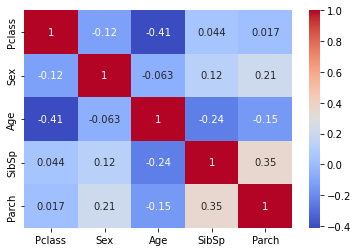

In [49]:
sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],axis=1).corr(), annot=True, cmap='coolwarm')

In [50]:
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [51]:
#loops throught the entire column of age for missing values and tries to find if there are similar datasets to fill the age information
#else it just fills it in with the median age
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp']==combine.iloc[index]['SibSp']) & (combine['Parch']==combine.iloc[index]['Parch']) & (combine['Pclass']==combine.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [52]:
combine['Age'].isnull().sum()

0

Data transformation

In [53]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x>0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

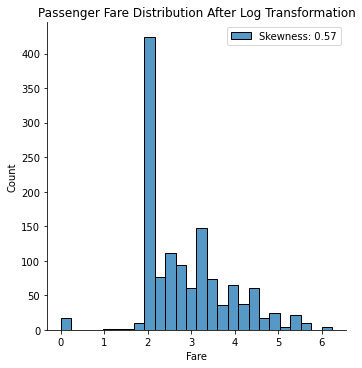

In [54]:
#passenger fare distribution after log transformation

sns.displot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

Feature enginnering 

Art of creating new features from existing features to better represent the underlaying problme to the predictive models resulting in improved model acurracy on uneen data


In [55]:
#Title
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [56]:
#Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [57]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [58]:
#count the amount of unique combinations
combine['Title'].nunique()

18

In [59]:
combine['Title'] = combine['Title'].replace(['Dr','Rev','Col','Major','Lady','Jonkheer','Don','the Countess','Sir','Dona','Capt'],'Rare')
combine['Title'] = combine['Title'].replace(['Mlle','Ms'],'Miss')
combine['Title'] = combine['Title'].replace('Mme','Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

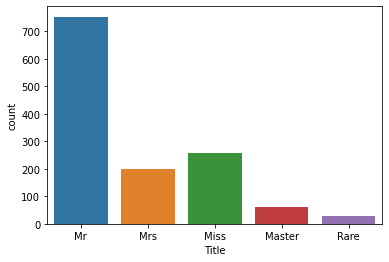

In [60]:
sns.countplot(combine['Title'])

In [61]:
combine[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of Survival by Title')

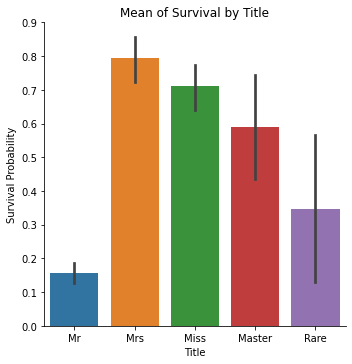

In [62]:
sns.factorplot(x='Title', y='Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title("Mean of Survival by Title")

In [63]:
combine = combine.drop('Name', axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [64]:
#is alone
combine['FamilySize'] = combine['SibSp'] + combine['Parch']+1
combine[['SibSp', 'Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [65]:
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending= False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [66]:
combine['IsAlone']=0
combine.loc[combine['FamilySize'] == 1, 'IsAlone']=1

#Create a is alone feature by looking at the family size

In [67]:
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [68]:
combine = combine.drop(['SibSp','Parch','FamilySize'], axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [69]:
#Age class -> we are transforming age into ordinal variable, it's a categorical var but with intrisinc ordering in their values
#creating age bands and compute means of survival

combine['AgeBand'] = pd.cut(combine['Age'],5)
combine[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [70]:
#assgin ordinals to each age band

combine.loc[combine['Age']<=16.136, 'Age']=0;
combine.loc[(combine['Age']>16.136 )& (combine['Age']<=32.102), 'Age']=1
combine.loc[(combine['Age']>32.102) & (combine['Age']<=48.068), 'Age']=2
combine.loc[(combine['Age']>48.068) & (combine['Age']<=64.034), 'Age']=3
combine.loc[(combine['Age']>64.034), 'Age']=4

In [71]:
combine = combine.drop('AgeBand', axis=1)

In [72]:
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [73]:
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtypes

dtype('int32')

In [74]:
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


Feature encoding since machine learning requieres all its input variables to be numeric

In [75]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [76]:
combine = pd.get_dummies(combine, columns=['Title'])
combine = pd.get_dummies(combine, columns= ['Embarked'], prefix='Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [77]:
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='Survived', ascending=True)

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [78]:
combine.loc[combine['Fare']<=1.56, 'Fare']=0
combine.loc[(combine['Fare']>1.56) & (combine['Fare']<=3.119), 'Fare'] =1
combine.loc[(combine['Fare']>3.119) & (combine['Fare']<=4.679), 'Fare'] =2
combine.loc[combine['Fare']>4.679, 'Fare']=3

In [79]:
combine['Fare'] = combine['Fare'].astype('int')


In [80]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S,FareBand
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1,"(1.56, 3.119]"
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0,"(3.119, 4.679]"
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1,"(1.56, 3.119]"
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1,"(3.119, 4.679]"
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1,"(1.56, 3.119]"


In [81]:
combine = combine.drop('FareBand', axis =1)

In [82]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [83]:
#separate training and test set from combined dataframe

train = combine[:len(train)]
test = combine[:len(test)]

In [86]:
train = train.drop('PassengerId', axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [87]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [88]:
test = test.drop('Survived', axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [89]:
#modeling

X_train = train.drop('Survived', axis =1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis =1).copy()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)


(881, 14)
(881,)
(418, 14)


In [90]:
#Logistic regresion

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

80.93

In [91]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.09

In [92]:
#K-nearest Neighbours

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.79

In [93]:
#Gaussian Naive Bayes

guassian = GaussianNB()
guassian.fit(X_train, Y_train)
Y_pred = guassian.predict(X_test)
acc_gaussian = round(guassian.score(X_train, Y_train)*100, 2)
acc_gaussian

79.11

In [94]:
#Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred - perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
acc_perceptron

79.57

In [95]:
#Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear = round(linear_svc.score(X_train, Y_train)*100, 2)
acc_linear

80.25

In [96]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

85.7

In [98]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

85.7

In [99]:
#CatBoost

catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train)*100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 141ms	remaining: 2m 20s
1:	learn: 0.6798485	total: 143ms	remaining: 1m 11s
2:	learn: 0.6729520	total: 145ms	remaining: 48.3s
3:	learn: 0.6669729	total: 147ms	remaining: 36.7s
4:	learn: 0.6607853	total: 150ms	remaining: 29.8s
5:	learn: 0.6554568	total: 152ms	remaining: 25.2s
6:	learn: 0.6500727	total: 154ms	remaining: 21.8s
7:	learn: 0.6437982	total: 157ms	remaining: 19.5s
8:	learn: 0.6398272	total: 160ms	remaining: 17.6s
9:	learn: 0.6351628	total: 163ms	remaining: 16.1s
10:	learn: 0.6305969	total: 165ms	remaining: 14.8s
11:	learn: 0.6252274	total: 168ms	remaining: 13.9s
12:	learn: 0.6203165	total: 172ms	remaining: 13s
13:	learn: 0.6163249	total: 174ms	remaining: 12.3s
14:	learn: 0.6126752	total: 177ms	remaining: 11.6s
15:	learn: 0.6078515	total: 179ms	remaining: 11s
16:	learn: 0.6033553	total: 181ms	remaining: 10.5s
17:	learn: 0.5984437	total: 184ms	remaining: 10s
18:	learn: 0.5935188	total: 187ms	remaining: 9.63s
19:	learn: 0.589

In [102]:
#select training accuracy

models = pd.DataFrame({'Model': ['Support Vector', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron','Linear SVC','Decision Tree','Catboost'],
'Score':[acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_linear, acc_decision_tree,acc_catboost ]})

models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,Catnoost,85.70
3,KNN,84.79
4,Support Vector,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11


In [103]:
#k-fold cross validation 
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [104]:
cv_results =[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy',cv=10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 1.48ms	remaining: 1.48s
1:	learn: 0.6803102	total: 2.72ms	remaining: 1.36s
2:	learn: 0.6743326	total: 4.13ms	remaining: 1.37s
3:	learn: 0.6684760	total: 5.9ms	remaining: 1.47s
4:	learn: 0.6624557	total: 7.37ms	remaining: 1.47s
5:	learn: 0.6573314	total: 8.91ms	remaining: 1.48s
6:	learn: 0.6520748	total: 10.8ms	remaining: 1.52s
7:	learn: 0.6460856	total: 12.2ms	remaining: 1.51s
8:	learn: 0.6422711	total: 13.2ms	remaining: 1.46s
9:	learn: 0.6376840	total: 14.6ms	remaining: 1.45s
10:	learn: 0.6326541	total: 15.7ms	remaining: 1.41s
11:	learn: 0.6272334	total: 16.9ms	remaining: 1.39s
12:	learn: 0.6224744	total: 18ms	remaining: 1.36s
13:	learn: 0.6175199	total: 19.6ms	remaining: 1.38s
14:	learn: 0.6124417	total: 21.1ms	remaining: 1.39s
15:	learn: 0.6097890	total: 22ms	remaining: 1.35s
16:	learn: 0.6050558	total: 23.5ms	remaining: 1.36s
17:	learn: 0.6004952	total: 25ms	remaining: 1.37s
18:	learn: 0.5958639	total: 26.4ms	remaining: 1.36s

In [105]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [108]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)


,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.815028,0.036378,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803664,0.042356,KNN
4,0.800243,0.033294,Linear SVC
5,0.799132,0.033823,Random Forest
6,0.788904,0.025236,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.743450,0.074274,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

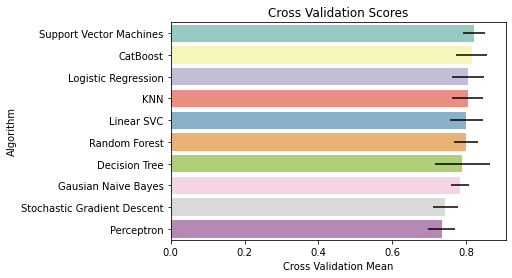

In [112]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [113]:
#Hyperparameter turning for SVM

param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose =3)

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [114]:
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator:  SVC(C=10, gamma=0.1)


In [115]:
svc = SVC(C=100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.54

In [116]:
cross_val_score(svc, X_train, Y_train, scoring='accuracy', cv=10).mean()

0.8297242083758938

In [117]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
ss.shape

(418, 2)

In [121]:
sumbit = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived ': Y_pred})
sumbit.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [122]:
sumbit.shape

(418, 2)

In [125]:
sumbit.to_csv(r"C:\Users\Chen\Documents\Programming\Kaggle\titanic\svm_titanic.csv", index = False)
